# 1. Preparación de los datos

## Importación de librerías y lectura de CSV

En esta sección se realiza la importación de las librerías que se utilizarán en este trabajo, la librería pandas se utiliza para manipular los datos en forma de Dataframnes, numpy se utiliza para poder trabajar con columnas como vectores de manera que sea más familiar su manipulación, matplotlib se utilizará para 

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Tecnicas de aprendizaje
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Metricas
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [3]:
df = pd.read_csv("OnlinePaymentsFraudDetectionDataset.csv", sep=',', header=0)
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


## Análisis del Dataset

### Vistazo general a tipo de columnas y cantidad de muestras

Como se puede apreciar a continuación se cuenta con una cantidad de muestras bastante amplia (6362620 muestras), con 11 características.

Con columnas de tipo objeto como "type", "nameOrig" y "nameDest".   En caso de trabajar con alguna de estas se deberá pasar a valores de tipo numérico.

Las demás columnas son de tipo entero o de tipo flotante, por tanto no será necesario modificarlas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
filas = df.shape[0]
columnas = df.shape[1]
print("La cantidad de registros es ", filas)
print("La cantidad de columnas es ", columnas)

La cantidad de registros es  6362620
La cantidad de columnas es  11


Se ejecuta el siguiente fragmento de código para encontrar valores NaN en el dataset.   Como se puede observar, no se encuentra ningún valor de este tipo, por esta razón no se realiza ninguna modificación.

In [ ]:
print("Los valores NaN presentes en las columnas se observan en la siguiente matriz \n")
valores = df.isna().sum()
print(valores)

Los valores NaN presentes en las columnas se observan en la siguiente matriz 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### Información 

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Nuestra variable dependiente y la cuál se desea predecir es la columna llamada isFraud, la cual califica como operaciones fraudulentas aquellos registros cuyo valor en esta característica sea 1, y no fraudulentas aquellos cuyo valor sea 0.

In [ ]:
print(df.groupby('isFraud').size())

Total = df.groupby('isFraud').size()[1] + df.groupby('isFraud').size()[0]
Fraud = df.groupby('isFraud').size()[1]
NotFraud = df.groupby('isFraud').size()[0]

PercentFraud = round((Fraud/Total)*100, 3)
PercentNotFraud = round((NotFraud/Total)*100, 3)

print("Is not fraud: ", PercentNotFraud,"%")
print("Is fraud: ", PercentFraud,"%")

isFraud
0    6354407
1       8213
dtype: int64
Is not fraud:  99.871 %
Is fraud:  0.129 %


Text(0.5, 1.0, 'Rango de edad')

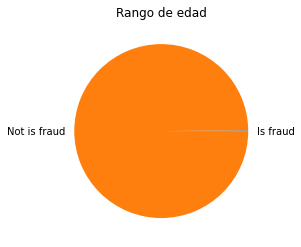

In [ ]:
plt.pie([PercentFraud, PercentNotFraud], labels= ["Is fraud", "Not is fraud"])
plt.title('Rango de edad')

A simple vista se puede concluir que el dataset se encuentra bastante desbalanceado.    Considerando que el conjunto con menor cantidad de muestras es "Is fraud" que posee 8213 registros, frente al otro conjunto (Is not fraud) que cuenta con un total de 6.354.407 registros, hay una notable diferencia de 0,129% frente a un 99,871%.  

Se entiende que existen métodos para balancear los datos, incluso sin necesidad de modificar el dataset como es el ejemplo de 
se puede obtener una cantidad de registros de 16426.   Este sería un dataset con una cantidad suficiente de muestras.

## Preprocesamiento de los datos

### Conversión de los valores categoricos a numéricos

In [4]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Selección de las características a utilizar

In [5]:
df = df[["type","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]]
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,2,11668.14,41554.0,29885.86,0.0,0.0,0


### Normalización de los datos

In [6]:
valores = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

datosNorm = scaler.transform(valores)
df = pd.DataFrame(datosNorm, index=df.index, columns=df.columns)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.25,0.000106,0.002855,0.003233,0.000000,0.0,0.0
1,0.25,0.000020,0.000357,0.000391,0.000000,0.0,0.0
2,0.75,0.000002,0.000003,0.000000,0.000000,0.0,1.0
3,0.00,0.000002,0.000003,0.000000,0.000059,0.0,1.0
4,0.25,0.000126,0.000697,0.000603,0.000000,0.0,0.0


Se emplea el método RandomUnderSampler para sub muestrear la clase mayoritaria, y de esta manera tener menos muestras para disminuir la potencia computacional necesaria para procesar los datos.

In [ ]:
x = np.array(df[["type","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]])
y = np.array(df["isFraud"])
RUS = RandomUnderSampler(random_state=8)
XRus, YRus = RUS.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(YRus))


Resampled dataset shape Counter({0: 8213, 1: 8213})


In [ ]:
print(XRus.shape)
print(YRus.shape)
dfRusNum = np.concatenate((XRus, np.array([YRus]).T), axis=1)
print(dfRusNum.shape)

dfRus = pd.DataFrame(dfRusNum, columns = ["type","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"])
dfRus.head()

(16426, 6)
(16426,)
(16426, 7)


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3.0,241838.11,9106.00,250944.11,122871.48,0.00,0.0
1,3.0,62367.73,6297157.89,6359525.62,1885439.51,1823071.79,0.0
2,2.0,6314.31,384954.23,378639.92,0.00,0.00,0.0
3,3.0,76184.20,12612439.92,12688624.12,1073750.66,997566.46,0.0
4,1.0,434191.01,0.00,0.00,1943662.53,2377853.54,0.0


Ahora se genera un nuevo archivo CSV con los datos balanceados.

In [ ]:
dfRus.to_csv('OnlinePaymentsFraudDetectionDatasetBalanced.csv', index=False)

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.1 , test_size=0.2, random_state = 8)
#print(x_train)
#print(x_test)

# 2. Procesamiento de los datos

### Conjunto de entrenamiento y validación

In [8]:
xC = np.array(df[["type","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"]])
yC = np.array(df["isFraud"])

X_trainC, X_testC, Y_trainC, Y_testC = train_test_split(xC, yC, test_size=0.2, random_state=0)

print("Tamaño del conjunto X de entrenamiento ", X_trainC.shape)
print("Tamaño del conjunto y de entrenamiento ", Y_trainC.shape)
print("Tamaño del conjunto x de test ", X_testC.shape)
print("Tamaño del conjunto y de test ", Y_testC.shape)

Tamaño del conjunto X de entrenamiento  (5090096, 6)
Tamaño del conjunto y de entrenamiento  (5090096,)
Tamaño del conjunto x de test  (1272524, 6)
Tamaño del conjunto y de test  (1272524,)


### K-nearest neighbors

In [177]:
def plot_roc_curve(f, t):
    plt.plot(f, t, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

In [178]:
knnC = KNeighborsClassifier()
knnC.fit(X_trainC, Y_trainC)
predKnnC = knnC.predict(X_testC)

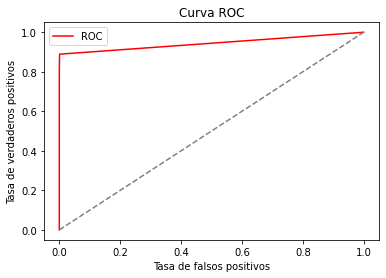

Coeficiente de correlación de Matthews:  0.8447417228064578
F1-Score:  0.8420705572040884


In [180]:
MCCknnC = matthews_corrcoef(Y_testC, predKnnC)
F1SCknnC = f1_score(Y_testC, predKnnC)

prob = knnC.predict_proba(X_testC)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCCknnC)
print("F1-Score: ", F1SCknnC)


### Árboles de decisión

In [181]:
dtcC = DecisionTreeClassifier(random_state = 0)
dtcC.fit(X_trainC, Y_trainC)
preddtcC = dtcC.predict(X_testC)

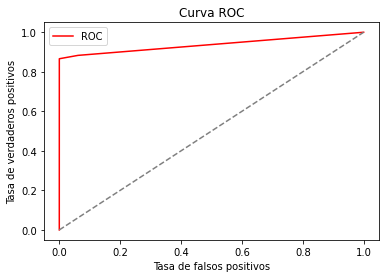

Coeficiente de correlación de Matthews:  0.884590220280506
F1-Score:  0.8845315904139434


In [182]:
MCCdtcC = matthews_corrcoef(Y_testC, preddtcC)
F1SCdtcC = f1_score(Y_testC, preddtcC)

prob = dtcC.predict_proba(X_testC)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCCdtcC)
print("F1-Score: ", F1SCdtcC)

### Regresión logística

In [183]:
lrcC = LogisticRegression(random_state = 0)
lrcC.fit(X_trainC, Y_trainC)
predlrcC = lrcC.predict(X_testC)

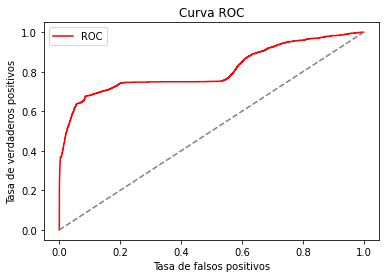

Coeficiente de correlación de Matthews:  0.2758592508041075
F1-Score:  0.14350282485875707


In [184]:
MCClrcC = matthews_corrcoef(Y_testC, predlrcC)
F1SClrcC = f1_score(Y_testC, predlrcC)

prob = lrcC.predict_proba(X_testC)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCClrcC)
print("F1-Score: ", F1SClrcC)

### PCA con los datos completos

In [103]:
pca = PCA(n_components=6, random_state=2)
X_trainCdf = pd.DataFrame(X_trainC)
pca.fit(X_trainCdf)
dfPCA = pd.DataFrame(data= pca.components_, columns = ["type","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"], index=["PC1","PC2","PC3","PC4","PC5","PC6"])
dfPCA.head(7)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
PC1,0.995832,0.005251,0.056552,0.071239,0.002641,0.003362
PC2,-0.090935,-0.005941,0.633462,0.768355,0.006584,0.002856
PC3,-0.004778,0.209949,-0.001978,-0.005634,0.657235,0.723813
PC4,-0.004781,0.953267,0.047879,-0.030099,-0.296662,-0.007265
PC5,0.001980,-0.065423,0.769105,-0.634294,-0.022674,0.036742
PC6,0.000382,-0.207028,-0.041335,0.035896,-0.692437,0.688965


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[9.15041010e-01 8.13297945e-02 3.03918170e-03 5.33059949e-04
 4.67535799e-05 1.02007085e-05]


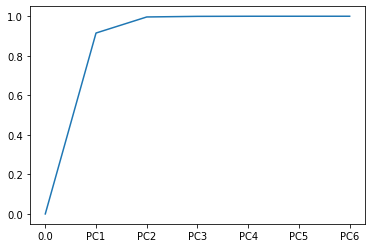

Con la primera componente se logra explicar el  91.50410096027922 %


In [147]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

acumulado = [0]
acumulado.extend(np.cumsum(pca.explained_variance_ratio_))

plt.plot(['0.0' ,'PC1','PC2','PC3','PC4','PC5','PC6'], acumulado)
plt.show()
print("Con la primera componente se logra explicar el ", (acumulado[1]*100),"%")

Con la primera componente se puede explicar un poco más del 91% de la varianza explicada.

In [159]:
pca = PCA(n_components=2)
X_trainCdf = pd.DataFrame(X_trainC)
pca.fit(X_trainCdf)
dfPCA = pd.DataFrame(data= pca.components_, columns = ["type","amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest"], index=["PC1","PC2"])
dfPCA.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
PC1,0.995832,0.005251,0.056552,0.071239,0.002641,0.003362
PC2,-0.090935,-0.005941,0.633462,0.768355,0.006584,0.002856


In [163]:
XTrainpca = np.array(pca.transform(pd.DataFrame(X_trainC.T).T))
XTestpca = np.array(pca.transform(pd.DataFrame(X_testC.T).T))

### K-nearest neighbors con PCA

In [170]:
knnCpca = KNeighborsClassifier()
knnCpca.fit(XTrainpca, Y_trainC)
predKnnCpca = knnCpca.predict(XTestpca)

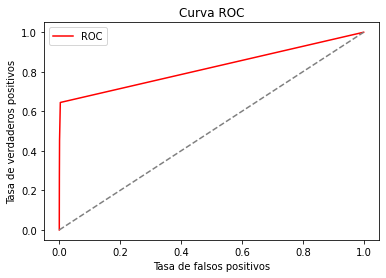

Coeficiente de correlación de Matthews:  0.38395102094397593
F1-Score:  0.3632686084142395


In [171]:
MCCknnCpca = matthews_corrcoef(Y_testC, predKnnCpca)
F1SCknnCpca = f1_score(Y_testC, predKnnCpca)

prob = knnCpca.predict_proba(XTestpca)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCCknnCpca)
print("F1-Score: ", F1SCknnCpca)

### Árboles de decisión con PCA

In [172]:
dtcCpca = DecisionTreeClassifier(random_state = 0)
dtcCpca.fit(XTrainpca, Y_trainC)
preddtcCpca = dtcCpca.predict(XTestpca)

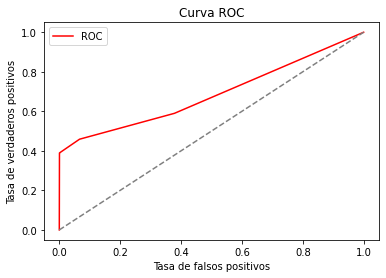

Coeficiente de correlación de Matthews:  0.4238061331770834
F1-Score:  0.4227318045862412


In [173]:
MCCdtcCpca = matthews_corrcoef(Y_testC, preddtcCpca)
F1SCdtcCpca = f1_score(Y_testC, preddtcCpca)

prob = dtcCpca.predict_proba(XTestpca)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCCdtcCpca)
print("F1-Score: ", F1SCdtcCpca)

### Regresión logística con PCA

In [174]:
lrcCpca = LogisticRegression(random_state = 0)
lrcCpca.fit(XTrainpca, Y_trainC)
predlrcCpca = lrcCpca.predict(XTestpca)

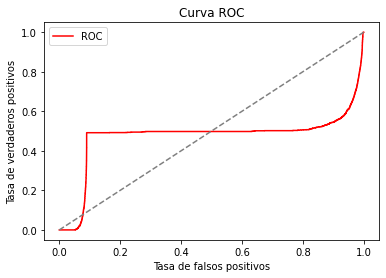

Coeficiente de correlación de Matthews:  0.0
F1-Score:  0.0


In [193]:
MCClrcCpca = matthews_corrcoef(Y_testC, predlrcCpca)
F1SClrcCpca = f1_score(Y_testC, predlrcCpca)

prob = lrcCpca.predict_proba(XTestpca)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCClrcCpca)
print("F1-Score: ", F1SClrcCpca)

### K-nearest neighbors con Grid Search

In [191]:
param_grid = dict(n_neighbors=[2,3,4])
KnnCgrid = GridSearchCV(knnC, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
KnnCgrid.fit(X_trainC,Y_trainC)
print(KnnCgrid.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
{'n_neighbors': 4}


In [197]:
knnCg = KNeighborsClassifier(n_neighbors=4)
knnCg.fit(X_trainC, Y_trainC)
predKnnCg = knnCg.predict(X_testC)

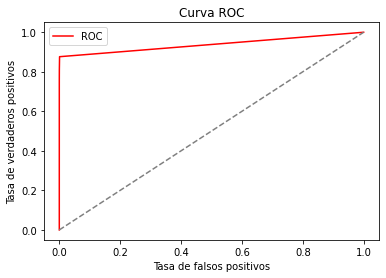

Coeficiente de correlación de Matthews:  0.8505418210268877
F1-Score:  0.8457644279446507


In [198]:
MCCknnCg = matthews_corrcoef(Y_testC, predKnnCg)
F1SCknnCg = f1_score(Y_testC, predKnnCg)

prob = knnCg.predict_proba(X_testC)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCCknnCg)
print("F1-Score: ", F1SCknnCg)

### Árboles de decisión con grid Search

In [196]:
param_grid = dict(max_depth = [2,4,6,8,10,12])
dtcCgrid = GridSearchCV(dtcC, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
dtcCgrid.fit(X_trainC,Y_trainC)
print(dtcCgrid.best_params_)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
{'max_depth': 12}


In [199]:
dtcCg = DecisionTreeClassifier(random_state = 0, max_depth = 12)
dtcCg.fit(X_trainC, Y_trainC)
preddtcCg = dtcC.predict(X_testC)

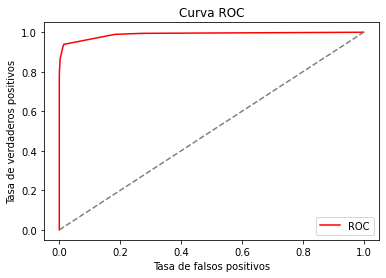

Coeficiente de correlación de Matthews:  0.884590220280506
F1-Score:  0.8845315904139434


In [200]:
MCCdtcCg = matthews_corrcoef(Y_testC, preddtcCg)
F1SCdtcCg = f1_score(Y_testC, preddtcCg)

prob = dtcC.predict_proba(X_testC)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCCdtcC)
print("F1-Score: ", F1SCdtcC)

### Regresión logística con grid Search

In [206]:
param_grid = dict(penalty=['none', 'l2'])
lrcCgrid = GridSearchCV(lrcC, param_grid, scoring='accuracy', return_train_score=False,verbose=1)
lrcCgrid.fit(X_trainC,Y_trainC)
print(lrcCgrid.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'penalty': 'none'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lrcCg = LogisticRegression(random_state = 0)
lrcCg.fit(X_trainC, Y_trainC)
predlrcCg = lrcC.predict(X_testC)

In [ ]:
MCClrcCg = matthews_corrcoef(Y_testC, predlrcCg)
F1SClrcCg = f1_score(Y_testC, predlrcCg)

prob = lrcCg.predict_proba(X_testC)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(Y_testC, prob)
plot_roc_curve(fper, tper)

print("Coeficiente de correlación de Matthews: ", MCClrcCg)
print("F1-Score: ", F1SClrcCg)